In [7]:
from tvDatafeed import TvDatafeed,Interval
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing as mp
import os
import json
import numpy as np
import requests
from trade import cross_ema, ichimoku_cloud, macd, collect_mtfssl_pvtdiver, macd_ssl_vwap
from sklearn import preprocessing
import datetime
# from talib.abstract import EMA, MACD

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
tv = TvDatafeed(username=None,password=None)

In [13]:
with open(os.path.join(os.getcwd(),'config','list_stock','stock_config.json')) as f:
    json_stock = json.load(f)

In [14]:
def get_data(tv, exchange, name_stock, n_bars):
    return tv.get_hist(name_stock, exchange, interval=Interval.in_daily, n_bars=n_bars)

In [5]:
import talib

In [12]:
import talib.abstract as ta
def ak_macd_bb_2(df,length = 10, dev =1, fastlength = 12, slowlength = 26, signallength = 9):
    fastma = ta.EMA(df['close'], fastlength)
    slowma = ta.EMA(df['close'], slowlength)
    macd = fastma - slowma

    stdev = macd.rolling(window=length).std()
    Upper = (stdev * dev + (macd.rolling(window=length).mean()))
    Lower = ((macd.rolling(window=length).mean()) - (stdev * dev))
    return Upper, Lower

In [9]:
def ak_macd_bb(df,length = 10, dev =1, fastlength = 12, slowlength = 26, signallength = 9):
    fastma = talib.EMA(df['close'], fastlength)
    slowma = talib.EMA(df['close'], slowlength)
    macd = fastma - slowma

    stdev = macd.rolling(window=length).std()
    Upper = (stdev * dev + (macd.rolling(window=length).mean()))
    Lower = ((macd.rolling(window=length).mean()) - (stdev * dev))
    return Upper, Lower
    # return upperband, middleband, lowerband
    


In [10]:
import math
import talib.abstract as ta

In [5]:
def VWAP(close, volume):
    cumulative_product = (close*volume).cumsum()
    # calculate the cumulative volume
    cumulative_volume = volume.cumsum()
    # divide the cumulative product by cumulative volume
    vwap = cumulative_product / cumulative_volume
    return vwap

In [7]:
def vwap(df, n=14):
    """Calculates the Volume Weighted Average Price (VWAP) indicator.
    
    Args:
        df: A pandas DataFrame containing the 'close' and 'volume' columns.
        n: The number of periods to use for the calculation.
        
    Returns:
        A pandas Series containing the VWAP values.
    """
    # Create a new column for the rolling sum of volume multiplied by the closing price
    df['vwap_sum'] = df['close'] * df['volume']
    # Create a new column for the rolling sum of volume
    df['volume_sum'] = df['volume']
    # Calculate the VWAP
    df['VWAP'] = df['vwap_sum'].rolling(n).sum() / df['volume_sum'].rolling(n).sum()
    return df

In [11]:
df = get_data(tv, "NYSE", "ORCL", 3000)
df = df.reset_index()

In [12]:
df

,datetime,symbol,open,high,low,close,volume
0,2011-02-25 21:30:00,NYSE:ORCL,32.28999,33.08501,32.27000,32.95000,20850416.0
1,2011-02-28 21:30:00,NYSE:ORCL,33.06000,33.23000,32.67999,32.89999,19406704.0
2,2011-03-01 21:30:00,NYSE:ORCL,33.02000,33.08000,31.61000,31.66499,30423280.0
3,2011-03-02 21:30:00,NYSE:ORCL,31.58000,32.36000,31.55000,32.12000,23091504.0
4,2011-03-03 21:30:00,NYSE:ORCL,32.47000,33.19000,32.42999,33.02750,24169856.0
...,...,...,...,...,...,...,...
2995,2023-01-20 21:30:00,NYSE:ORCL,86.03000,87.38000,85.49500,87.25000,5567493.0
2996,2023-01-23 21:30:00,NYSE:ORCL,87.19000,89.13000,86.97000,88.97000,7390256.0
2997,2023-01-24 21:30:00,NYSE:ORCL,89.05000,90.09500,88.00000,89.70000,7004581.0
2998,2023-01-25 21:30:00,NYSE:ORCL,88.70000,89.86000,87.74000,89.64000,5896812.0


In [9]:
df = get_data(tv, "SET", "SCB", 3000)
df = df.reset_index()
df = vwap(df)
buyers = df[df["close"] > df["VWAP"]].shape[0] / df.shape[0] * 100
sellers = df[df["close"] < df["VWAP"]].shape[0] / df.shape[0] * 100
# print(f'buyers:{buyers}, sellers:{sellers}')
buyers>sellers
# obv = ta.OBV(df['close'], df['volume'])
# ad = ta.AD(df['high'], df['low'], df['close'], df['volume'])
# vwap = VWAP(df['close'], df['volume'])

False

In [13]:
df = get_data(tv, "SET", "SCB", 3000)
df = df.reset_index()
up, down = ak_macd_bb_2(df)
# print(df['close'].iloc[-1:] - up.iloc[-1:])
# print(f'buyers:{buyers}, sellers:{sellers}')
# obv = ta.OBV(df['close'], df['volume'])
# ad = ta.AD(df['high'], df['low'], df['close'], df['volume'])
# vwap = VWAP(df['close'], df['volume'])

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

In [18]:
up.iloc[-1:]

2999    2.114171
dtype: float64

In [19]:
down.iloc[-1:]

2999    0.866732
dtype: float64

In [17]:
df['close'].iloc[-1:]

2999    106.5
Name: close, dtype: float64

In [16]:
vsf.iloc[-1]

0.9656485342061736

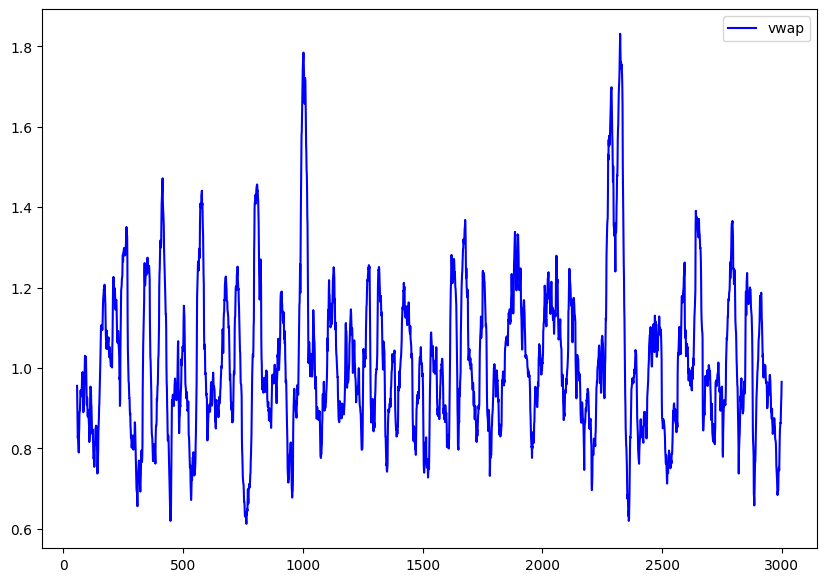

In [15]:
plt.figure(figsize=(10, 7))
# plt.plot(obv,'r', label='obv')
# plt.plot(df['close'],'g', label='close')
plt.plot(vsf,'b', label='vwap')
plt.legend()
plt.show()

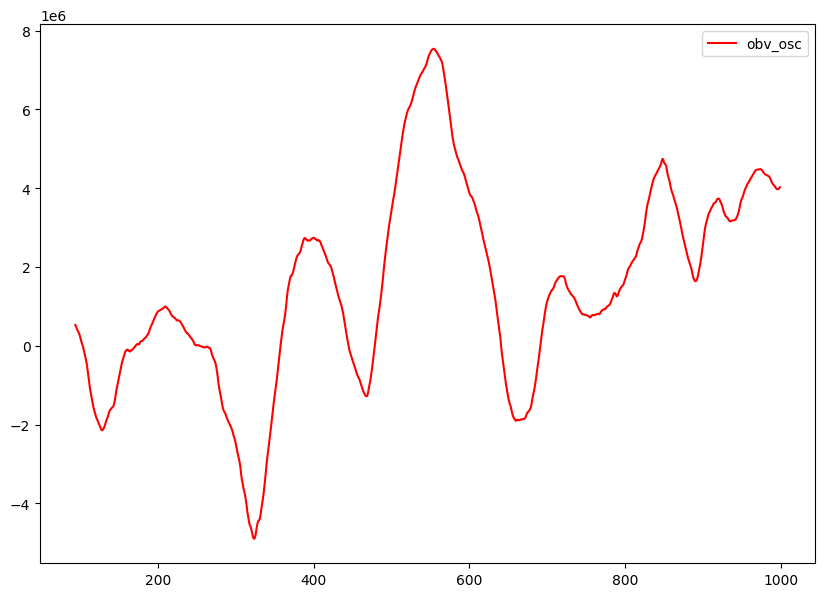

In [116]:
df = get_data(tv, "SET", "TOP", 1000)
df = df.reset_index()

obv = ta.OBV(df['close'], df['volume'])
# obv
obv_short_ema = ta.EMA(obv, 90)
obv_long_ema = ta.EMA(obv, 95)
obv_osc = obv_short_ema - obv_long_ema
if obv_osc[-2] > obv_osc[-1]:
    print('buy')
# print(obv[-1])


plt.figure(figsize=(10, 7))
plt.plot(obv_osc,'r', label='obv_osc')
# plt.plot(df['close'],'y', label='close')
# plt.plot(real,'b', label='real')
plt.legend()
plt.show()


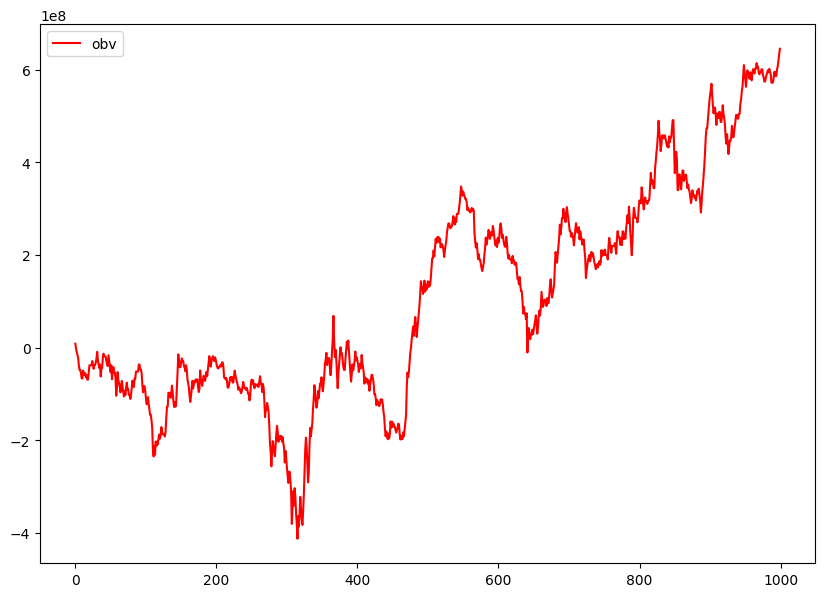

In [114]:
df = get_data(tv, "SET", "TOP", 1000)
df = df.reset_index()

# Get the close prices and volume
close = np.asarray(df['close'])
volume = np.asarray(df['volume'])

# Calculate the OBV
obv = talib.OBV(close, volume)
plt.figure(figsize=(10, 7))
plt.plot(obv,'r', label='obv')
# plt.plot(df['close'],'y', label='close')
# plt.plot(real,'b', label='real')
plt.legend()
plt.show()
# Make trading decisions based on OBV
# for i in range(len(obv)):
#     if i == 0:
#         continue
#     if obv[i] > obv[i-1]:
#         # Buying pressure, consider a long position
#         print("Buying pressure, consider a long position")
#     elif obv[i] < obv[i-1]:
#         # Selling pressure, consider a short position
#         print("Selling pressure, consider a short position")
#     else:
#         # No clear trend, consider holding or taking no position
#         print("No clear trend, consider holding or taking no position")

In [22]:
def ssl_hybrid(df, len1 = 30, mult=1, type_ssl='EMA'):
    # # Keltner Baseline Channel
    if type_ssl == 'WMA':
        BBMC =  talib.WMA(2 * ta.WMA(df['close'], int(len1 / 2)) - ta.WMA(df['close'], len1), int(np.round(np.sqrt(len1))))
    else:
        BBMC = talib.EMA(df['close'],len1)
    return BBMC


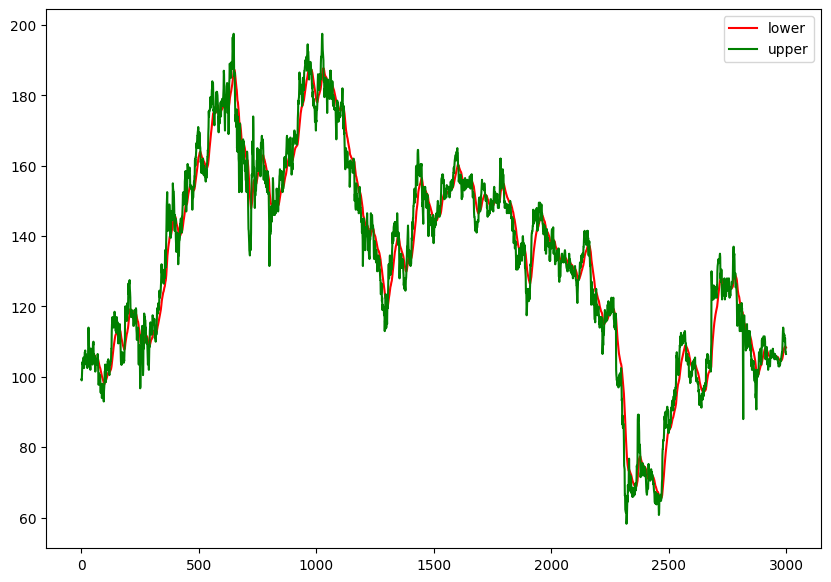

In [24]:

df = get_data(tv, "SET", "SCB", 3000)
df = df.reset_index()

# WMA1(df['high'], 60 / 2)
bbmc = ssl_hybrid(df)
# u, l = ak_macd_bb(df)
# u = u.dropna()
# print(u)

# print('close value:',df['close'].iloc[-1] - min(df['close'][-5:]))
# print('result:',df['close'].iloc[-1] - df['close'].iloc[-2])
# pvtup, pvtdown, pvt_osc = pvt_with_divergence(df, 90, 95)
# pvt_osc = normalize_list(pvt_osc)
plt.figure(figsize=(10, 7))
plt.plot(bbmc,'r', label='lower')
plt.plot(df['close'],'g', label='upper')
# plt.plot(m,'b', label='middle')
plt.legend()
plt.show()
# pvtup = pvtup.dropna()
# pvtdown = pvtdown.dropna()
# pvtup.to_list()[-1]
# type(pvtdown)
# rr = collect_mtfssl_pvtdiver(df,3,20)
# rr


In [27]:
(bbmc.iloc[-1:] - df['close'].iloc[-1:])>2

2999    False
dtype: bool

In [26]:
df['close'].iloc[-1:]

2999    106.5
Name: close, dtype: float64

In [144]:
indicator_config = {
    "cross_ema":{
        "low_span": 90,
        "long_span": 95
    },
    "plot_config":{
        "plot": False,
        "n_bar": 60
    }
}
    
# หาวันที่ควรซื้อหุ้นนี้ล่าสุด
df = get_data(tv, "SET", "CPALL", 10000)
result, df = cross_ema(df,"CPALL",**indicator_config)
df = df.reset_index()
df = df.dropna()
df = df.reset_index()
df['bors'] = df['low_df'] - df['long_df']
index_value = df[df['bors'] < 0].iloc[-1:].index.values[0]
df_date_buy = df.iloc[[int(index_value)+1]]
df_date_buy['datetime']
# df['bors'] = df.apply(calc_sum)

# df[df['ema']==0].iloc[-1:]

KeyError: 'low_span'

In [21]:
import datetime

In [22]:
df_date_buy['datetime'].values[0]

numpy.datetime64('2022-12-08T09:00:00.000000000')

In [23]:
# convert from numpy.datetime64 to datetime.datetime
unix_epoch = np.datetime64(0, 's')
one_second = np.timedelta64(1, 's')
seconds_since_epoch = (df_date_buy['datetime'].values[0] - unix_epoch) / one_second
d = datetime.datetime.utcfromtimestamp(seconds_since_epoch)
d

datetime.datetime(2022, 12, 8, 9, 0)

In [24]:
cc = datetime.datetime.today().date() - d.date()
print(cc.days)

43


In [8]:
from talib.abstract import EMA, MACD

In [9]:
def macd_test(df, namest):
    df['macd_line'], df["signal_line"], _ = MACD(df['close'])
    macd_line = list(df['macd_line'])
    signal_line = list(df["signal_line"])
        
    #     buy
    if macd_line[-1] > signal_line[-1]:
        return 2, df #False
    #     sell
    elif macd_line[-1] < signal_line[-1]:
        return -1, df #True
    return 0, df

In [19]:
v = {'a':12,'b':20,'c':2}
dict(sorted(v.items(), key=lambda item: item[1],reverse=True))


{'b': 20, 'a': 12, 'c': 2}

In [20]:
r= {}
r['a']=1
r['b']=12
r

{'a': 1, 'b': 12}

In [11]:
df = get_data(tv, "SET", "CPALL", 100)
df = df.reset_index()
df = df[df['close'] == min(list(df['close']))] 
df
# df = df.iloc[:,2:]

# c= macd_test(df=df, namest="CPALL")
# ichimoku_cloud(df = df, namest="CPALL")
# macd(df = df, namest="CPALL")
# low_df = EMA(df['close'], 90)
# print(low_df[-1])
# low_df
# long_df = EMA(df['close'], long_span)

,datetime,symbol,open,high,low,close,volume
32,2022-10-07 09:00:00,SET:CPALL,54.5,54.5,53.5,53.75,11873659.0


In [35]:
indicator_config = {
    "ema":[
        {
            "low_span": 90,
            "long_span": 95
        },
        {
            "low_span": 100,
            "long_span": 200
        }
    ]
}
for i in indicator_config['ema']:
    print(i)

{'low_span': 90, 'long_span': 95}
{'low_span': 100, 'long_span': 200}


In [15]:
list(df['macd_line'])[-1]

1.013803161925182

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

list_stock = list()
indicator_config = {
    "ema":[
        {
            "low_span": 30,
            "long_span": 35
        },
        {
            "low_span": 90,
            "long_span": 95
        },
        {
            "low_span": 100,
            "long_span": 200
        }
    ]
}

config = {
    "find-min": True,
    "find-max": True
}

# loop key score
dict_stock_name_score = {}
dict_min_value_1 = {}
dict_min_value_2 = {}
dict_remaining_date = {}

for key_exc in json_stock['list_stock']:
    for namest in json_stock['list_stock'][key_exc]:
        dict_stock_name_score.update({namest:0})

print('dict_stock_name_score:',dict_stock_name_score)
# find current date
current_date = datetime.datetime.today().date()

for key_exc in json_stock['list_stock']:
    print(f'exchange: {key_exc}')
    for namest in json_stock['list_stock'][key_exc]:
        try:
            data = get_data(tv, key_exc, namest, 3000)
            data = data.reset_index()
        except Exception as e:
            print(f'stock name: {namest}')
            print(f'error: {e}')
            continue
        
        score_ema = 0
        score_mtfssl_pvtdiver = 0
        for iconfig in indicator_config['ema']:
            try:
                result_ema = cross_ema(df = data, namest = namest, **iconfig)
            except Exception as e:
                print(f'error {namest} cross_ema: {e}')
            score_ema += result_ema[0]

            for day in [30, 60, 90]:
                try:
                    result_mtfssl_pvtdiver = collect_mtfssl_pvtdiver(data, iconfig['low_span'],iconfig['long_span'], day)
                except Exception as e:
                    print(f'error {namest} collect_mtfssl_pvtdiver: {e}')
                score_mtfssl_pvtdiver += result_mtfssl_pvtdiver

        try:
            result_macd_ssl_vwap = macd_ssl_vwap(data)
        except Exception as e:
            print(f'error {namest} macd_ssl_vwap: {e}')

        try:    
            result_ichimoku = ichimoku_cloud(df = data, namest = namest)
        except Exception as e:
            print(f'error {namest} ichimoku_cloud: {e}')

        try:
            result_macd = macd(df = data, namest= namest)
        except Exception as e:
            print(f'error {namest} macd: {e}')
        
        if score_mtfssl_pvtdiver > 6:
                score_mtfssl_pvtdiver = 5

        dict_stock_name_score[namest] = dict_stock_name_score[namest] + score_ema + result_ichimoku[0] + result_macd[0] + score_mtfssl_pvtdiver + result_macd_ssl_vwap

        # find row with the least close value 
        # df = df[df['close'] == min(list(df['close']))] 

        # find date with the least value in data. do it every month
        list_time = [62, 93]
        for t in list_time:
            data_follow_time = get_data(tv, key_exc, namest, t)
            data_follow_time = data_follow_time.reset_index()

            # find min value in dataframe
            data_cal_number_days = data_follow_time[data_follow_time['close'] == min(list(data_follow_time['close']))]
            # convert timestamp to datetime.date
            if len(data_cal_number_days) > 1:
                data_cal_number_days = data_cal_number_days.iloc[-1,:]
                date_min_value = data_cal_number_days['datetime'].to_pydatetime().date()
            else:
                # convert numpy.datetime64 to datetime
                date_min_value = pd.to_datetime(data_cal_number_days['datetime'].values[0]).to_pydatetime().date()
            # date_min_value = data_cal_number_days['datetime'].to_pydatetime().date()
            remaining_date = current_date - date_min_value
            
            df_min_value = data_follow_time[data_follow_time['close'] == min(list(data_follow_time['close']))]
            df_current_value = data_follow_time.iloc[-2:-1,:]
            if t == 62:
                dict_min_value_1[namest] = df_current_value['close'].values[0] - min(list(data_follow_time['close']))
                dict_remaining_date[namest] = remaining_date.days
            else:
                dict_min_value_2[namest] = df_current_value['close'].values[0] - min(list(data_follow_time['close']))
                dict_remaining_date[namest] = remaining_date.days
    #     break
    # break

# sort data by current close value minus the smallest a value in the past
dict_min_value_1_sort = dict(sorted(dict_min_value_1.items(), key=lambda item: item[1], reverse=True))
dict_min_value_2_sort = dict(sorted(dict_min_value_2.items(), key=lambda item: item[1], reverse=True))
# sort data remaining date
dict_remaining_date_sort = dict(sorted(dict_remaining_date.items(), key=lambda item: item[1], reverse=True))

print('-'*100)
print('dict_min_value_1_sort:',dict_min_value_1_sort)
print('-'*100)

print('result step 1:',dict_stock_name_score)

# loop increase score
for dict_sort_value in [dict_min_value_1_sort, dict_min_value_2_sort, dict_remaining_date_sort]:
    # normalize score
    list_score = [i*100 for i in range(1,len(dict_sort_value)+1)]
    np_score = np.array(list_score)
    normalized_arr = preprocessing.normalize([np_score])


    dict_score = {} 
    for score,(k,v) in zip(normalized_arr.tolist()[0],dict_sort_value.items()):
        dict_score.update({k:score})

    for k,v in dict_score.items():
        dict_stock_name_score[k] = dict_stock_name_score[k] + dict_score[k]


dict_stock_name_score_sort = dict(sorted(dict_stock_name_score.items(), key=lambda item: item[1], reverse=True))
print('-'*100)
for k,v in dict_stock_name_score_sort.items():
    print(k,v)
print('-'*100)

# score date buy last day


# score distance between min close value and close value have to buy



dict_stock_name_score: {'M': 0, 'CRC': 0, 'HMPRO': 0, 'TISCO': 0, 'CPALL': 0, 'KBANK': 0, 'DELTA': 0, 'AOT': 0, 'MINT': 0, 'SCGP': 0, 'UPA': 0, 'BANPU': 0, 'BDMS': 0, 'ADVANC': 0, 'PTTEP': 0, 'PTT': 0, 'COM7': 0, 'TOP': 0, 'SCB': 0, 'THG': 0, 'MASTER': 0, 'UV': 0, 'TTB': 0, 'AWC': 0, 'BBL': 0, 'BEM': 0, 'BGRIM': 0, 'BTS': 0, 'KTB': 0, 'TRUE': 0, 'CPF': 0, 'ACE': 0, 'AMATA': 0, 'AP': 0, 'BAM': 0, 'BEC': 0, 'EGCO': 0, 'NER': 0, 'TVO': 0, 'QH': 0, 'LH': 0, 'KKP': 0, 'DCC': 0, 'SAT': 0, 'DRT': 0, 'ORI': 0, 'TU': 0, 'INTUCH': 0, 'BGC': 0, 'RATCH': 0, 'NOBLE': 0, 'THANI': 0, 'PYLON': 0, 'SIRI': 0, 'MBKET': 0, 'KGI': 0, 'AIT': 0, 'TKS': 0, 'LHK': 0, 'GC': 0, 'ASK': 0, 'PM': 0, 'SMIT': 0, 'ASP': 0, 'WINNER': 0, 'MSC': 0, 'MFC': 0, 'MFEC': 0, 'TMD': 0, 'PATO': 0, 'POPF': 0, 'SENA': 0, 'KCAR': 0, 'SPF': 0, 'CPNRF': 0, 'TFUND': 0, 'GLOW': 0, 'TTW': 0, 'BCP': 0, 'LANNA': 0, 'TCAP': 0, 'PTTGC': 0, 'JTS': 0, 'TEAMG': 0, 'FSMART': 0, 'AAPL': 0, 'TSLA': 0, 'NFLX': 0, 'BNTX': 0, 'AMZN': 0, 'MSFT': 0, '

ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


stock name: MBKET
error: 'NoneType' object has no attribute 'reset_index'


ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


stock name: SPF
error: 'NoneType' object has no attribute 'reset_index'


ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


stock name: CPNRF
error: 'NoneType' object has no attribute 'reset_index'


ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


stock name: TFUND
error: 'NoneType' object has no attribute 'reset_index'


ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


stock name: GLOW
error: 'NoneType' object has no attribute 'reset_index'
exchange: NASDAQ
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
error AKAN collect_mtfssl_pvtdiver: list index out of range
exchange: NYSE
exchange: CSE
exchange: EURONEXT
exchange: HKEX
exchange: LSE
exchange: MIL
----------------------------------------------------------------------------------------------------
dict_min_value_1_sort: {'BRBY': 563.0, 'DELTA': 314.0, 'CDI': 171.0, 'MC': 162.29998999999998, 'NFLX': 113.29999999999998, 'ADBE': 72.42000000000002, 'KER': 66.85000000000002, 'N

In [61]:
df_current_value

,datetime,symbol,open,high,low,close,volume


In [11]:
for k,v in dict_stock_name_score_sort.items():
    print(k,v)

TOP 8.391953200678408
TISCO 8.30485248941654
BDMS 6.631480156648546
PTTEP 6.217751778154671
KBANK 6.174201422523737
HMPRO 5.718580867910415
AOT 5.609704978833079
THG 5.479053911940277
CRC 5.4572787341248095
CPALL 5.174201422523737
DELTA 5.043550355630934
BANPU 3.783906401356816
M 3.718580867910415
PTT 0.5879298010176119
ADVANC 0.08710071126186844
COM7 -0.4991709102442565
AAPL -0.7604730440298617
SCB -2.6733723327679932


In [17]:
dict_min_value_1_sort = {'DELTA': 302.0, 'ADVANC': 17.0, 'KBANK': 11.0, 'AAPL': 10.190000000000012, 'CPALL': 10.0, 'PTTEP': 7.0, 'SCB': 7.0, 'TISCO': 6.75, 'TOP': 5.75, 'THG': 4.75, 'CRC': 3.25, 'COM7': 3.25, 'PTT': 2.5, 'BDMS': 2.25, 'AOT': 2.0, 'M': 1.25, 'HMPRO': 1.0, 'BANPU': 0.09999999999999964}
len(dict_min_value_1_sort)
# for i,(k,v) in enumerate(dict_min_value_1_sort.items()):
#     print(i,k,v)

18

In [71]:
df = get_data(tv, "SET", "CPALL", 100)
df = df.reset_index()
df = df[df['close'] == min(list(df['close']))]
df

,datetime,symbol,open,high,low,close,volume
30,2022-10-07 09:00:00,SET:CPALL,54.5,54.5,53.5,53.75,11873659.0


In [72]:
type(df)

pandas.core.frame.DataFrame

In [64]:
if len(df)>1:
    df = df.iloc[-1,:]

In [87]:
df['datetime'].values[0]

numpy.datetime64('2022-10-07T09:00:00.000000000')

In [123]:
df = get_data(tv, "SET", "CPALL", 3000)
df = df.reset_index()
ssl_d,ssl_u = mtf_ssl(df, 250)

In [130]:
ssl_u.to_list()[-1]

63.262

In [131]:
ssl_d.to_list()[-1]

62.177

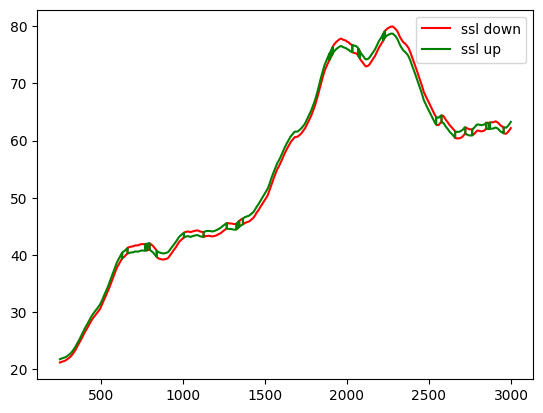

In [126]:
plt.plot(ssl_d,'r', label='ssl down')
plt.plot(ssl_u,'g', label='ssl up')
plt.legend()
plt.show()